In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
from astropy.stats import sigma_clipped_stats
from photutils import DAOStarFinder, CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import astropy.io.fits as pf
plt.rcParams['figure.figsize'] = (15,9)

In [2]:
def SourceDetect(file, SIG, FWHM, THRESH, store = False, PlotStars = False, PrintStars = False): #file = string
    image = pf.open(file)
    im = image[0].data
    mean, median, std = sigma_clipped_stats(im, sigma=SIG)
    daofind = DAOStarFinder(fwhm = FWHM, threshold = THRESH * std) 
    sources = daofind(im - median)
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    if(PlotStars):
        apertures = CircularAperture(positions, r = 6.) #choose a number large enough to go over the stars
        norm = ImageNormalize(stretch = SqrtStretch())
        plt.imshow(im, cmap = 'Greys', origin = 'lower', norm = norm, interpolation = 'nearest')
        apertures.plot(color = 'blue', lw = 0.5, alpha = 1)
        for i in range(0, len(sources)):
            plt.text(sources[i]['xcentroid'], sources[i]['ycentroid'], i, color='black');
    if(PrintStars):
        print(positions)
    if(store):
        return positions

In [3]:
def tracking(initial_position, startimno, stopimno, FWHM, group):
    target_coords = []
    start_point = np.reshape(initial_position, (1,2))
    i = startimno
    
    if group == 1:
        
        while i <= stopimno:
            p = SourceDetect('red_asteroid/reduced_UCD_0' + str(i) + '.fits', 3, FWHM[i-222], 11, True)
            where1 = np.where((p[:,1] < start_point[0][1]+20) & (p[:,1] > start_point[0][1]-20) & (p[:,0] < start_point[0][0]+10) & (p[:,0] > start_point[0][0]-10))
            potential = np.array([p[where1[0][i]] for i in range(len(where1[0]))])
        
            diff = np.abs(potential - start_point)
            maxindex = np.where(diff[:,1] == min(diff[:,1]))
        
            target_coords.append(potential[maxindex])
            start_point = np.reshape(potential[maxindex], (1,2))
            i += 1
        return target_coords
    
    if group == 2:
                
        while i <= stopimno:
            p = SourceDetect('red_asteroid/reduced_UCD_0' + str(i) + '.fits', 3, FWHM[i-285], 11, True)
            where1 = np.where((p[:,1] < start_point[0][1]+20) & (p[:,1] > start_point[0][1]-20) & (p[:,0] < start_point[0][0]+10) & (p[:,0] > start_point[0][0]-10))
            potential = np.array([p[where1[0][i]] for i in range(len(where1[0]))])
        
            diff = np.abs(potential - start_point)
            maxindex = np.where(diff[:,1] == min(diff[:,1]))
        
            target_coords.append(potential[maxindex])
            start_point = np.reshape(potential[maxindex], (1,2))
            i += 1
        return target_coords
    
    if group == 3:
                
        while i <= stopimno:
            p = SourceDetect('red_asteroid/reduced_UCD_0' + str(i) + '.fits', 3, FWHM[i-222], 11, True)
            where1 = np.where((p[:,1] < start_point[0][1]+20) & (p[:,1] > start_point[0][1]-20) & (p[:,0] < start_point[0][0]+10) & (p[:,0] > start_point[0][0]-10))
            potential = np.array([p[where1[0][i]] for i in range(len(where1[0]))])
        
            diff = np.abs(potential - start_point)
            maxindex = np.where(diff[:,1] == min(diff[:,1]))
        
            target_coords.append(potential[maxindex])
            start_point = np.reshape(potential[maxindex], (1,2))
            i += 1
        return target_coords
    
    if group == 4:
                
        while i <= stopimno:
            p = SourceDetect('red_asteroid/reduced_UCD_0' + str(i) + '.fits', 3, FWHM[i-285], 11, True)
            where1 = np.where((p[:,1] < start_point[0][1]+20) & (p[:,1] > start_point[0][1]-20) & (p[:,0] < start_point[0][0]+10) & (p[:,0] > start_point[0][0]-10))
            potential = np.array([p[where1[0][i]] for i in range(len(where1[0]))])
        
            diff = np.abs(potential - start_point)
            maxindex = np.where(diff[:,1] == min(diff[:,1]))
        
            target_coords.append(potential[maxindex])
            start_point = np.reshape(potential[maxindex], (1,2))
            i += 1
        return target_coords
    else:
        print('Group must be either 1, 2, 3, or, 4')

In [4]:
#Importing list of FWHM for each image 
p1FWHMs = np.loadtxt('p1_FWHM')
p2FWHMs = np.loadtxt('p2_FWHM')

NameError: name 'position1_coords' is not defined

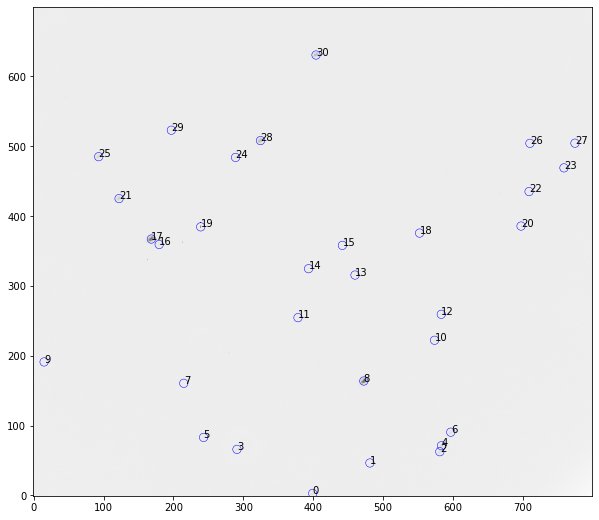

In [5]:
#Running SourceDetect to find the initial position of the asteroid for tracking

p1 = SourceDetect('red_asteroid/reduced_UCD_0222.fits', 3, p1FWHMs[0], 8, True, True)
plt.plot(position1_coords[:,0], position1_coords[:,1], 'r')

In [7]:
p1[28]    #Coordinates for the asteroid

array([324.54856106, 507.7439333 ])

In [8]:
position1_coords = np.reshape(tracking(p1[28], 222, 284, p1FWHMs, 1), (63,2))

In [7]:
np.savetxt('position1_coords.txt', position1_coords)

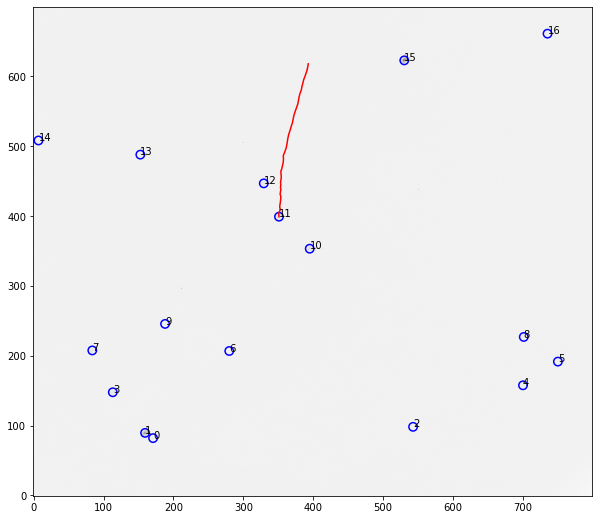

In [15]:
p2 = SourceDetect('red_asteroid/reduced_UCD_0285.fits', 3, p2FWHMs[0], 8, True, True)
plt.plot(position2_coords[:,0], position2_coords[:,1], 'r')

In [12]:
p2[11]    #Coordinates for the asteroid

array([350.9856077 , 398.83788499])

In [13]:
position2_coords = np.reshape(tracking(p2[11], 285, 335, p2FWHMs, 2), (51,2))

In [11]:
np.savetxt('position2_coords.txt', position2_coords)

# Tracking reference star

In [15]:
ref1FWHM = np.loadtxt('ref1_FWHM.txt')
ref2FWHM = np.loadtxt('ref2_FWHM.txt')

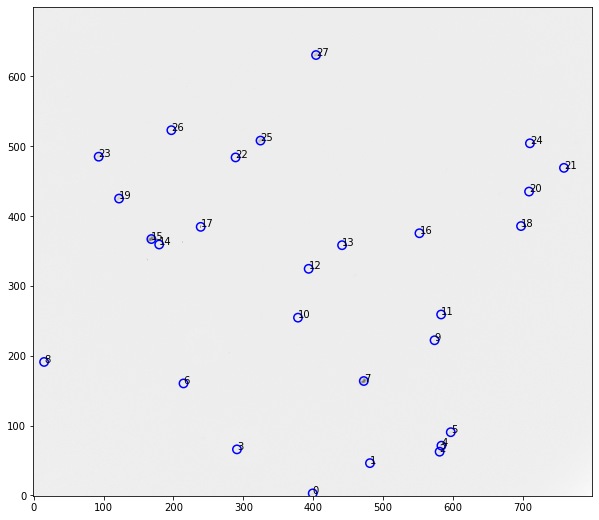

In [16]:
ref1 = SourceDetect('red_asteroid/reduced_UCD_0222.fits', 3, ref1FWHM[0], 8, True, True)

In [17]:
ref1[27]

array([403.99047888, 630.13323189])

In [18]:
refstar1_coords = np.reshape(tracking(ref1[27], 222, 284, ref1FWHM, 3), (63,2))

In [19]:
np.savetxt('refstar1_coords.txt', refstar1_coords)

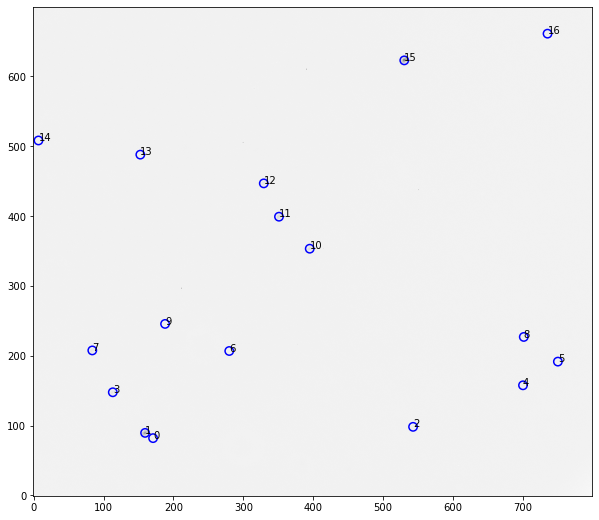

In [20]:
ref2 = SourceDetect('red_asteroid/reduced_UCD_0285.fits', 3, ref2FWHM[0], 8, True, True)

In [21]:
ref2[10]

array([394.97003672, 353.04472658])

In [23]:
refstar2_coords = np.reshape(tracking(ref2[10], 285, 335, ref2FWHM, 4), (51,2))

In [24]:
np.savetxt('refstar2_coords.txt', refstar2_coords)